In [1]:
import zipfile

from google.colab import drive
drive.mount('/content/drive')

#the path to zip file
zip_path = '/content/drive/MyDrive/AI and ML/FruitinAmazon.zip'

#the destination directory to extract the contents
Extract_dir = '/content/drive/MyDrive/Worksheet 5/Extracted_data'

# Create the directory if it doesn't exist
import os
os.makedirs(Extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(Extract_dir)

print("Extraction complete!")

Mounted at /content/drive
Extraction complete!


Task 1

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [3]:
# Define the dataset directory
train_dir = "/content/drive/MyDrive/Worksheet 5/Extracted_data/FruitinAmazon/test"


In [4]:
# Get the list of class directories
class_names = sorted(os.listdir(train_dir))


In [5]:
# Select one random image from each class
selected_images = []
labels = []

In [6]:
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        image_files = os.listdir(class_path)  # List all images
        if image_files:  # Check if there are images in the folder
            img_file = random.choice(image_files)  # Randomly select one image
            img_path = os.path.join(class_path, img_file)  # Get full image path
            selected_images.append(img_path)
            labels.append(class_name)

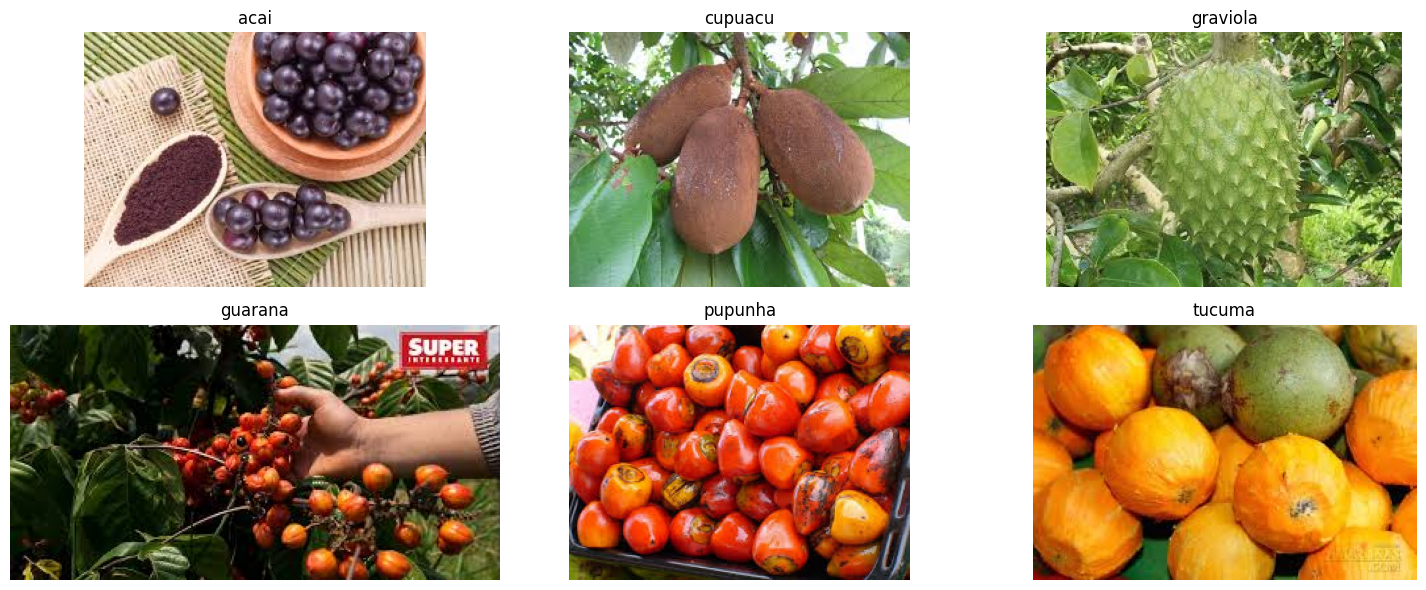

In [7]:
# Display images in a grid format (2 rows)
fig, axes = plt.subplots(nrows=2, ncols=len(selected_images)//2, figsize=(15, 6))
axes = axes.flatten()

for ax, img_path, label in zip(axes, selected_images, labels):
    img = mpimg.imread(img_path)  # Read the image correctly
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

plt.tight_layout()
plt.show()



Check for Corrupted Image

In [8]:
import os
from PIL import Image

In [9]:
# Define the dataset directory
train_dir = "/content/drive/MyDrive/Worksheet 5/Extracted_data/FruitinAmazon/train"  # Update this path

In [10]:
# List of corrupted images
corrupted_images = []

In [11]:
# Iterate through each class folder
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):  # Ensure it's a directory
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                with Image.open(image_path) as img:
                    img.verify()  # Verify if the image is valid
            except (IOError, SyntaxError):  # If error, image is corrupted
                corrupted_images.append(image_path)
                os.remove(image_path)  # Remove the corrupted image
                print(f"Removed corrupted image: {image_path}")


In [12]:
# Final Report
if not corrupted_images:
    print("No Corrupted Images Found.")
else:
    print(f"\nTotal Corrupted Images Removed: {len(corrupted_images)}")


No Corrupted Images Found.


Task 2

In [13]:
import tensorflow as tf


In [14]:
# Define dataset path
train_dir = "/content/drive/MyDrive/Worksheet 5/Extracted_data/FruitinAmazon/train"


In [15]:
# Define image size and batch size
img_height, img_width = 128, 128  # Resize images to 128x128
batch_size = 32  # Number of images in each batch
validation_split = 0.2  # 80% training, 20% validation

In [16]:
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0,1]

In [17]:
# Load and preprocess the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Labels inferred from folder names
    label_mode='int',  # Labels encoded as integers
    image_size=(img_height, img_width),
    interpolation='nearest',  # Resize using nearest neighbor
    batch_size=batch_size,
    shuffle=True,  # Shuffle images for training
    validation_split=validation_split,
    subset='training',  # Load training data
    seed=123  # Ensures reproducibility
).map(lambda x, y: (rescale(x), y))  # Apply normalization

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [18]:
# Load and preprocess the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,  # No shuffle for validation
    validation_split=validation_split,
    subset='validation',  # Load validation data
    seed=123
).map(lambda x, y: (rescale(x), y))  # Apply normalization


Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [20]:
# Define image dimensions and number of classes
img_height, img_width = 128, 128  # Image size
num_classes = 10

In [21]:
# Build the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected (Dense) Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

Task 4 Compile the Model

In [24]:
import tensorflow as tf

model.compile(
    optimizer='adam',  # Adam optimizer is widely used for its adaptive learning rate
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Accuracy as the evaluation metric
)


Task 4: Train the Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define a simple sequential model with an updated input shape
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Updated input shape (128x128 RGB images)
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # This layer should now have the appropriate input size
    Dense(10, activation='softmax')  # For 10-class classification
])

# Compile the model
model.compile(
    optimizer=Adam(),  # Adam optimizer
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Track accuracy
)

# Define the callbacks
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    train_ds,  #training dataset
    validation_data=val_ds,  #validation dataset
    epochs=250,
    batch_size=16,
    callbacks = [checkpoint, early_stopping],  # Using both callbacks
    verbose=1
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.0440 - loss: 11.0808
Epoch 1: val_loss improved from inf to 11.64854, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.0503 - loss: 12.2975 - val_accuracy: 0.0000e+00 - val_loss: 11.6485
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.1302 - loss: 14.5426
Epoch 2: val_loss improved from 11.64854 to 1.12271, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 865ms/step - accuracy: 0.1289 - loss: 14.4035 - val_accuracy: 0.8333 - val_loss: 1.1227
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.2193 - loss: 6.0314
Epoch 3: val_loss did not improve from 1.12271
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 735ms/step - accuracy: 0.2235 - loss: 5.9971 - val_accuracy: 0.1667 - val_loss: 10.7699
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.4763 - loss: 2.7207
Epoch 4: val_loss did not improve from 1.12271
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 518ms/step - accuracy: 0.4683 - loss: 2.8122 - val_accuracy: 0.0000e+00 - val_loss: 9.8033
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.5868 - loss: 2.4731
Epoch 5: val_loss did not improve from 1.12271
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 691ms/step - accuracy: 0.5755 - loss: 2.5375 - val_accuracy: 0.0000e+00 - val_loss: 5.1318
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.4213 - loss: 2.5469
Epoch 6: val_loss did not improve from 1.12271
3/

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 822ms/step - accuracy: 0.8025 - loss: 0.8634 - val_accuracy: 0.6667 - val_loss: 0.7203
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.9456 - loss: 0.2054
Epoch 9: val_loss improved from 0.72033 to 0.60289, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 834ms/step - accuracy: 0.9418 - loss: 0.2147 - val_accuracy: 0.7778 - val_loss: 0.6029
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.9902 - loss: 0.1672
Epoch 10: val_loss improved from 0.60289 to 0.34195, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9891 - loss: 0.1687 - val_accuracy: 0.8889 - val_loss: 0.3420
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 1.0000 - loss: 0.1083
Epoch 11: val_loss did not improve from 0.34195
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 1.0000 - loss: 0.1035 - val_accuracy: 0.8889 - val_loss: 0.3539
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 1.0000 - loss: 0.0636
Epoch 12: val_loss did not improve from 0.34195
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 569ms/step - accuracy: 1.0000 - loss: 0.0618 - val_accuracy: 0.8889 - val_loss: 0.3888
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 1.0000 - loss: 0.0425
Epoch 13: val_loss did not improve from 0.34195
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 510ms/step - accuracy: 1.0000 - loss: 0.0426 - val_accuracy: 0.8333 - val_loss: 0.4137
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 697ms/step - accuracy: 1.0000 - loss: 0.0370
Epoch 14: val_loss did not improve from 0.34195
3/3 ━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 0.8889 - val_loss: 0.3213
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 1.0000 - loss: 0.0159
Epoch 18: val_loss improved from 0.32130 to 0.29718, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 815ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 0.8889 - val_loss: 0.2972
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - accuracy: 1.0000 - loss: 0.0113
Epoch 19: val_loss improved from 0.29718 to 0.28636, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 0.8889 - val_loss: 0.2864
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 1.0000 - loss: 0.0101
Epoch 20: val_loss improved from 0.28636 to 0.28615, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 880ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.8889 - val_loss: 0.2862
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 1.0000 - loss: 0.0081
Epoch 21: val_loss did not improve from 0.28615
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.8889 - val_loss: 0.2906
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 1.0000 - loss: 0.0068
Epoch 22: val_loss did not improve from 0.28615
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 836ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.8333 - val_loss: 0.3003
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 23: val_loss did not improve from 0.28615
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 655ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.8333 - val_loss: 0.3078
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 1.0000 - loss: 0.0050
Epoch 24: val_loss did not improve from 0.28615
3/3 

Task 5: Evaluate the Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3240 - loss: 1.0786
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7725 - loss: 0.8790 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8503 - loss: 0.8111 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8525 - loss: 0.7306
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6963 - loss: 0.6479 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8892 - loss: 0.5817 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9072 - loss: 0.5403 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9363 - loss: 0.5059 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9738 - loss: 0.4547 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9653 - loss: 0.4161
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9667 - loss: 0.3923
Test Loss: 0.3923024535179138
Test Accuracy: 0.9666666388511658


Task 6: Save and Load the Model

In [27]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Save the trained model to a .h5 file
model.save('iris_model.h5')
print("Model saved to 'iris_model.h5'")

# Load the saved model
loaded_model = load_model('iris_model.h5')
print("Model loaded from 'iris_model.h5'")

# Re-evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)

# Print the evaluation results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3224 - loss: 1.3875
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3180 - loss: 1.1017 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2947 - loss: 1.0325 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5205 - loss: 0.9501 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8348 - loss: 0.8950 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9443 - loss: 0.8362 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7319 - loss: 0.7569 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6672 - loss: 0.7297  
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9015 - loss: 0.6782 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8717 - loss: 0.6290 


Model saved to 'iris_model.h5'


Model loaded from 'iris_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.9667 - loss: 0.5681
Test Loss: 0.5681040287017822
Test Accuracy: 0.9666666388511658


Task 7: Predictions and Classification Report

In [28]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes for Iris dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Save the trained model to a .h5 file
model.save('iris_model.h5')
print("Model saved to 'iris_model.h5'")

# Load the saved model
loaded_model = load_model('iris_model.h5')
print("Model loaded from 'iris_model.h5'")

# Make predictions on the test set
predictions = loaded_model.predict(X_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(report)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2654 - loss: 1.1020
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7282 - loss: 0.9135 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6663 - loss: 0.8309
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7835 - loss: 0.7301 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9306 - loss: 0.6427 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8168 - loss: 0.5598 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8488 - loss: 0.5315
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8915 - loss: 0.4812 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9525 - loss: 0.4441 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8949 - loss: 0.3973 


Model saved to 'iris_model.h5'


Model loaded from 'iris_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9320 - loss: 0.4038 - val_accuracy: 1.0000 - val_loss: 0.4070
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9402 - loss: 0.3505 - val_accuracy: 0.9583 - val_loss: 0.4277
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9485 - loss: 0.3860 - val_accuracy: 1.0000 - val_loss: 0.3642
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9631 - loss: 0.3311 - val_accuracy: 0.9583 - val_loss: 0.3658
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9527 - loss: 0.3434 - val_accuracy: 0.9583 - val_loss: 0.3509
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9668 - loss: 0.3235 - val_accuracy: 0.9583 - val_loss: 0.3452
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9637 - loss: 0.3068 - val_accuracy: 1.0000 - val_loss: 0.3145
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9589 - loss: 0.2985 - val_accuracy: 0.9583 - val_loss: 0.3076


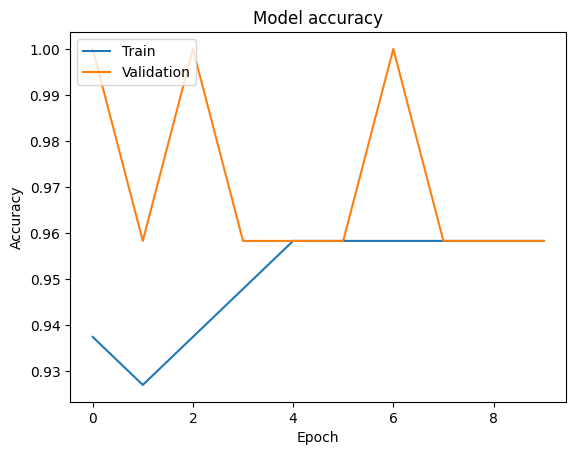

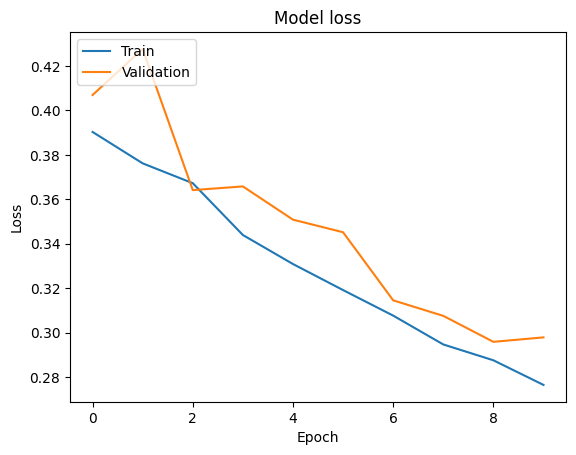

In [29]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
